In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from jupyterthemes import jtplot
from sklearn.metrics import auc, roc_curve, roc_auc_score
import copy
%matplotlib inline

### Load data from csv for train and test

In [27]:
data = pd.read_csv('train.csv')
orig_data = copy.deepcopy(data)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Drop ID column, it's useless for us

In [30]:
data = data.drop(columns=['Id'])

In [31]:
# MSSubClass is categorial, so let's make it string

data['MSSubClass'] = data['MSSubClass'].astype('str')

In [32]:
#Находим категориальные признаки
cat_feat = list(data.dtypes[data.dtypes == object].index)
cat_feat

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [33]:
#закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию
data[cat_feat] = data[cat_feat].fillna('Not in list')
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Not in list,Reg,Lvl,AllPub,Inside,...,0,Not in list,Not in list,Not in list,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Not in list,Reg,Lvl,AllPub,FR2,...,0,Not in list,Not in list,Not in list,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Not in list,IR1,Lvl,AllPub,Inside,...,0,Not in list,Not in list,Not in list,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Not in list,IR1,Lvl,AllPub,Corner,...,0,Not in list,Not in list,Not in list,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Not in list,IR1,Lvl,AllPub,FR2,...,0,Not in list,Not in list,Not in list,0,12,2008,WD,Normal,250000


In [34]:
#отфильтруем непрерывные признаки
num_feat = [f for f in data if f not in (cat_feat + ['ID'])]

# Смотрим сколько у нас значений по каждому категориальному признаку
cat_nunique = data[cat_feat].nunique()
print(cat_nunique)

MSSubClass       15
MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        5
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        6
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
SaleType          9
SaleCondition     6
dtype: int64


In [35]:
# Создаем дамми-переменные для категорий
dummy = pd.get_dummies(data[cat_feat], columns=cat_feat)
dummy

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [36]:
# Заменяем пропуски на специальное значение 0.0, чтобы деревья могли их отличить
data = pd.concat([data[num_feat].fillna(0.0), dummy], axis=1)
data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


### Thanks to Daniil for explain, use "corr()" function to find correlations

In [37]:
data.corr()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
LotFrontage,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,0.076670,-0.009312,0.160829,...,-0.011881,0.183706,0.001366,-0.139867,-0.008876,-0.004724,-0.009519,0.028489,-0.134115,0.184103
LotArea,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
OverallCond,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,...,-0.019779,-0.156175,-0.050663,0.163684,-0.046367,-0.038888,-0.033444,-0.023873,0.161642,-0.151659
YearBuilt,0.036853,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,...,-0.023431,0.346954,0.012122,-0.238463,-0.110233,-0.045601,-0.010104,-0.035785,-0.158427,0.343895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.004724,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011783,-0.014874,-0.015130,-0.034618,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009519,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.013748,0.021369,-0.026277,-0.059130,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.028489,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009535,0.000765,-0.007929,0.021534,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,-0.134115,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.081539,-0.019560,0.041207,-0.153930,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


### Let's find correlation between columns

In [38]:
corr_data = data.corr()
for column_name, row in corr_data.iterrows():
    for row_name, value in dict(row).items():
        if row_name != column_name and 0.97 < abs(value) < 1.0:
            print(f'Column "{column_name}" with Row "{row_name}": {abs(value)}')


Column "GarageYrBlt" with Row "GarageType_Not in list": 0.99860051564718
Column "GarageYrBlt" with Row "GarageFinish_Not in list": 0.99860051564718
Column "GarageYrBlt" with Row "GarageQual_Not in list": 0.99860051564718
Column "GarageYrBlt" with Row "GarageCond_Not in list": 0.99860051564718
Column "PoolArea" with Row "PoolQC_Not in list": 0.9896653207254367
Column "MSSubClass_190" with Row "BldgType_2fmCon": 0.9833947289220359
Column "BldgType_2fmCon" with Row "MSSubClass_190": 0.9833947289220359
Column "Exterior1st_CemntBd" with Row "Exterior2nd_CmentBd": 0.9741710841939724
Column "Exterior1st_MetalSd" with Row "Exterior2nd_MetalSd": 0.9730651937625319
Column "Exterior1st_VinylSd" with Row "Exterior2nd_VinylSd": 0.9775248873036357
Column "Exterior2nd_CmentBd" with Row "Exterior1st_CemntBd": 0.9741710841939724
Column "Exterior2nd_MetalSd" with Row "Exterior1st_MetalSd": 0.9730651937625319
Column "Exterior2nd_VinylSd" with Row "Exterior1st_VinylSd": 0.9775248873036357
Column "BsmtQual

### Let's view columns with most corr to SalePrice

In [39]:
corr_price = data.corr()['SalePrice'].sort_values(ascending=False)
print(abs(corr_price).head(5))

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64


### Split data to train and test

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['SalePrice']), data['SalePrice'], test_size=0.3)

In [86]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1279,60.0,7500,4,4,1920,1950,0.0,0,0,698,...,0,0,0,0,1,0,0,0,0,0
66,0.0,19900,7,5,1970,1989,287.0,912,0,1035,...,0,0,0,1,0,0,0,0,1,0
380,50.0,5000,5,6,1924,1950,0.0,218,0,808,...,0,0,0,1,0,0,0,0,1,0
176,97.0,10029,6,5,1988,1989,268.0,831,0,320,...,0,0,0,1,0,0,0,0,1,0
132,75.0,7388,5,6,1959,2002,0.0,405,0,658,...,0,0,0,1,0,0,0,0,1,0


In [87]:
y_train.head()

1279     68400
66      180000
380     127000
176     211000
132     150750
Name: SalePrice, dtype: int64

In [88]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1279,60.0,7500,4,4,1920,1950,0.0,0,0,698,...,0,0,0,0,1,0,0,0,0,0
66,0.0,19900,7,5,1970,1989,287.0,912,0,1035,...,0,0,0,1,0,0,0,0,1,0
380,50.0,5000,5,6,1924,1950,0.0,218,0,808,...,0,0,0,1,0,0,0,0,1,0
176,97.0,10029,6,5,1988,1989,268.0,831,0,320,...,0,0,0,1,0,0,0,0,1,0
132,75.0,7388,5,6,1959,2002,0.0,405,0,658,...,0,0,0,1,0,0,0,0,1,0


In [89]:
X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
237,0.0,9453,7,7,1993,2003,0.0,402,0,594,...,0,0,0,1,0,0,0,0,1,0
804,75.0,9000,5,5,1954,1954,0.0,812,0,124,...,0,0,0,1,0,0,0,1,0,0
702,82.0,12438,8,5,2006,2006,466.0,0,0,1234,...,0,1,0,0,0,0,0,0,0,1
1073,75.0,7950,6,6,1977,1977,140.0,535,0,155,...,0,0,0,1,0,0,0,0,1,0
751,0.0,7750,7,5,2003,2003,0.0,0,0,660,...,0,0,0,1,0,0,0,0,1,0


In [90]:
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,...,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,58.487280,10757.444227,6.100783,5.550881,1971.249511,1984.958904,102.833659,453.707436,42.879648,574.031311,...,0.001957,0.080235,0.000978,0.867906,0.071429,0.003914,0.008806,0.014677,0.819961,0.081213
std,35.463509,11355.110457,1.416504,1.095291,30.676464,20.790930,176.197461,470.090970,152.595302,441.566345,...,0.044216,0.271789,0.031281,0.338759,0.257665,0.062469,0.093473,0.120316,0.384408,0.273296
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,7588.500000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,245.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,63.000000,9475.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,399.000000,0.000000,487.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,79.000000,11644.500000,7.000000,6.000000,2001.000000,2004.000000,166.750000,728.000000,0.000000,811.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,5644.000000,1127.000000,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
data_types = X_train.dtypes
data_types.groupby(data_types).count()

uint8      283
int64       32
float64      3
dtype: int64

### Create forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

clf_rf1 = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=10, max_features=0.5, n_jobs=-1)
clf_rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=0.5, min_samples_leaf=10,
                       n_jobs=-1)

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

def mse_score(model, etalon=None, x_train=X_train, x_test=X_test, no_limits=True):
    my_pred_train_data = model.predict(x_train)
    my_pred_test_data = model.predict(x_test)
    
    fig, ax = plt.subplots(1,2,figsize=(15,7))
    ax[0].scatter(y_train, my_pred_train_data)
    if no_limits:
        ax[0].plot()
    else:
        ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()])
    ax[0].set_xlabel('Y_Train')
    ax[0].set_ylabel('Train Predicted')
    
    ax[1].scatter(y_test, my_pred_test_data)
    if no_limits:
        ax[1].plot()
    else:
        ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
    ax[1].set_xlabel('Y_Test')
    ax[1].set_ylabel('Test Predicted')
    plt.show()
    
    print(f'--- Train: Pred.val: {my_pred_train_data[0]}  Orig.val: {y_train.iloc[0]}')
    print(f'--- Test: Pred.val: {my_pred_test_data[0]}  Orig.val: {y_test.iloc[0]}')
    
    mse_train = np.sqrt(mean_squared_error(y_train, my_pred_train_data)).mean()
    mse_test = np.sqrt(mean_squared_error(y_test, my_pred_test_data)).mean()
    
    score_train = model.score(x_train, y_train)
    score_test = model.score(x_test, y_test)
    
    print(f'MSE Train: {mse_train}  MSE Test: {mse_test} ')
    print(f'Score Train: {score_train}  Score Test: {score_test}')
    if etalon is not None:
        print(f'Diff with etalon:')
        print(f'MSETrain: {etalon[0] - mse_train}  MSETest: {etalon[1] - mse_test} ')
        print(f'Score_train: {etalon[2] - score_train} Score_test: {etalon[3] - score_test}')
        
    return (mse_train,mse_test,score_test,score_train)


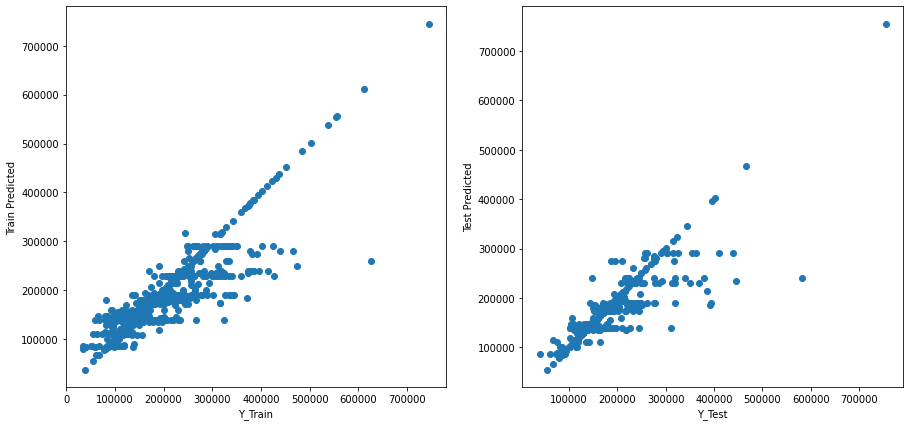

--- Train: Pred.val: 140000  Orig.val: 68400
--- Test: Pred.val: 189000  Orig.val: 194500
MSE Train: 37098.23509869919  MSE Test: 39611.52533312615 
Score Train: 0.3953033268101761  Score Test: 0.4018264840182648


In [92]:
etalon_score = mse_score(clf_rf1, None, X_train, X_test)

### Try to search best forest

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [10, 25, 50, 75, 100, 150],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : list(range(2, 8)),
    'min_samples_leaf': [1,2,5,10]
}
CV_rfc = GridSearchCV(estimator=clf_rf1, param_grid=param_grid, verbose=5, cv=10)
_ = CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 1/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   2.6s
[CV 2/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 3/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 4/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 5/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 6/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 7/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 8/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 9/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 10/10] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=10

[CV 2/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 3/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 4/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 5/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 6/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 7/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 8/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 9/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 10/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 1/10] END max_depth=2, max_features=auto, min_samples_leaf=2, n_estimators=75

[CV 3/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 4/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 5/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 6/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 7/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 8/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 9/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 10/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 1/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 2/10] END max_depth=2, max_features=auto, min_samples_leaf=5, n_esti

[CV 4/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 5/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 6/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 7/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 8/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 9/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 10/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 1/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 2/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 3/10] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=25

[CV 5/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 6/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 7/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 8/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 9/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 10/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 1/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 2/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 3/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 4/10] END max_depth=2, max_features=sqrt, min_samples_leaf=2, n_estimators=75

[CV 6/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 7/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 8/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 9/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 10/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 1/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 2/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 3/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 4/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 5/10] END max_depth=2, max_features=sqrt, min_samples_leaf=5, n_esti

[CV 6/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 7/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 8/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 9/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 10/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 1/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 2/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 3/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 4/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 5/10] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=25

[CV 7/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 8/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 9/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 10/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 1/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 2/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 3/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 4/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 5/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=75

[CV 7/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV 8/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.5s
[CV 9/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.5s
[CV 10/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.5s
[CV 1/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 2/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 3/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 4/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 5/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 6/10] END max_depth=3, max_features=auto, min_samples_leaf=5, n_esti

[CV 8/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 9/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 10/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 1/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 2/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 3/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 4/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 5/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 6/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 7/10] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=25

[CV 9/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 10/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=50; total time=   0.3s
[CV 1/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 2/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 3/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 4/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 5/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=75

[CV 9/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.5s
[CV 10/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.3s
[CV 1/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.5s
[CV 2/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 3/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 4/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 5/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 6/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 7/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 8/10] END max_depth=3, max_features=sqrt, min_samples_leaf=5, n_esti

[CV 10/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.2s
[CV 1/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 2/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 3/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 4/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 5/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 6/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 7/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 8/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 9/10] END max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=25

[CV 1/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 2/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 3/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 4/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 5/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=4, max_features=auto, min_samples_leaf=2, n_estimators=75

[CV 1/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 2/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 3/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 4/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 5/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 6/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 7/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 8/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.4s
[CV 9/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 10/10] END max_depth=4, max_features=auto, min_samples_leaf=5, n_esti

[CV 1/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 2/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 3/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 4/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 5/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 6/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 7/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 8/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 9/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 10/10] END max_depth=4, max_features=sqrt, min_samples_leaf=1, n_estimators=25

[CV 2/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 3/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 4/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 5/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=4, max_features=sqrt, min_samples_leaf=2, n_estimators=10

[CV 2/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 3/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 4/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 5/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 6/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 7/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 8/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 9/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 10/10] END max_depth=4, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 1/10] END max_depth=4, max_features=sqrt, min_samples_leaf=10, n_est

[CV 2/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 3/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 4/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 5/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 6/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 7/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 8/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 9/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 10/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 1/10] END max_depth=5, max_features=auto, min_samples_leaf=1, n_estimators=50

[CV 3/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 4/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 5/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 2/10] END max_depth=5, max_features=auto, min_samples_leaf=2, n_estimators=1

[CV 3/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 4/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.8s
[CV 5/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 6/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 7/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 8/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 9/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.8s
[CV 10/10] END max_depth=5, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.8s
[CV 1/10] END max_depth=5, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 2/10] END max_depth=5, max_features=auto, min_samples_leaf=10, n_est

[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 7/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=50

[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=2, n_estimators=

[CV 4/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 5/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 6/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 7/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 8/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 9/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.6s
[CV 10/10] END max_depth=5, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 1/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 2/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 3/10] END max_depth=5, max_features=sqrt, min_samples_leaf=10, n_est

[CV 4/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 5/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 6/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 7/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 8/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 9/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 10/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 1/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 2/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV 3/10] END max_depth=6, max_features=auto, min_samples_leaf=1, n_estimators=50

[CV 5/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 6/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 2/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 3/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 4/10] END max_depth=6, max_features=auto, min_samples_leaf=2, n_estimators

[CV 5/10] END max_depth=6, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 6/10] END max_depth=6, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 7/10] END max_depth=6, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 8/10] END max_depth=6, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 9/10] END max_depth=6, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 10/10] END max_depth=6, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 1/10] END max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 2/10] END max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 3/10] END max_depth=6, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 4/10] END max_depth=6, max_features=auto, min_samples_leaf=10, n_est

[CV 5/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 6/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 7/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 8/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 9/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 10/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 1/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 2/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 3/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 4/10] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=50

[CV 6/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 7/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 2/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 3/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 4/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 5/10] END max_depth=6, max_features=sqrt, min_samples_leaf=2, n_estimator

[CV 6/10] END max_depth=6, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 7/10] END max_depth=6, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 8/10] END max_depth=6, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 9/10] END max_depth=6, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 10/10] END max_depth=6, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 1/10] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 2/10] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 3/10] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 4/10] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 5/10] END max_depth=6, max_features=sqrt, min_samples_leaf=10, n_est

[CV 6/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 7/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 8/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 9/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 10/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 1/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV 2/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 3/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 4/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 5/10] END max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=50

[CV 7/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 8/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 2/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 3/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 4/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 5/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 6/10] END max_depth=7, max_features=auto, min_samples_leaf=2, n_estimato

[CV 7/10] END max_depth=7, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 8/10] END max_depth=7, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 9/10] END max_depth=7, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 10/10] END max_depth=7, max_features=auto, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 1/10] END max_depth=7, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 2/10] END max_depth=7, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 3/10] END max_depth=7, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 4/10] END max_depth=7, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 5/10] END max_depth=7, max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 6/10] END max_depth=7, max_features=auto, min_samples_leaf=10, n_est

[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.1s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.2s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=25; total time=   0.3s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.4s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.3s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=1, n_estimators=50

[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=75; total time=   0.4s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimators=100; total time=   0.5s
[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=2, n_estimat

[CV 8/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 9/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 10/10] END max_depth=7, max_features=sqrt, min_samples_leaf=5, n_estimators=150; total time=   0.7s
[CV 1/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 2/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 3/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 4/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 5/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 6/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.2s
[CV 7/10] END max_depth=7, max_features=sqrt, min_samples_leaf=10, n_est

{'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 150}

### So, GridSearcgCV said: best params are - {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 100}

In [93]:
clf_rf = RandomForestClassifier(max_depth=6, max_features='auto', min_samples_leaf=10, n_estimators=100, n_jobs=-1)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=10, n_jobs=-1)

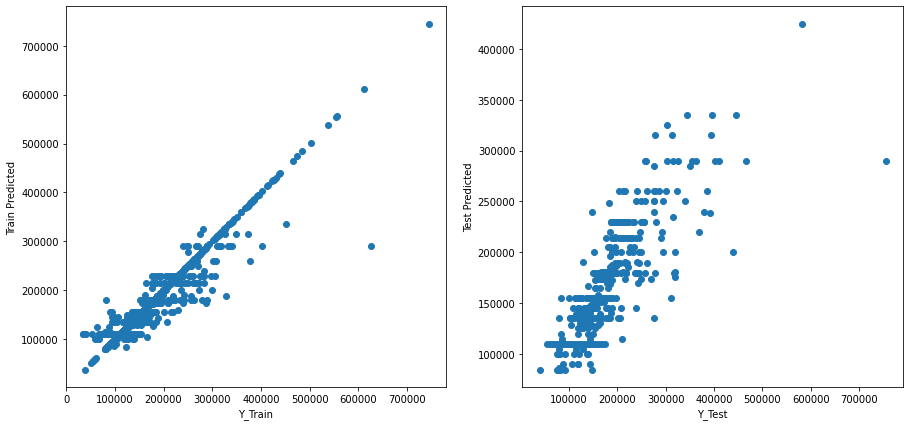

--- Train: Pred.val: 110000  Orig.val: 68400
--- Test: Pred.val: 189000  Orig.val: 194500
MSE Train: 22650.244503676357  MSE Test: 46455.38957186747 
Score Train: 0.6262230919765166  Score Test: 0.01141552511415525
Diff with etalon:
MSETrain: 14447.990595022831  MSETest: -6843.86423874132 
Score_train: -0.22439660795825178 Score_test: 0.3838878016960209


In [94]:
etalon_score = mse_score(clf_rf, etalon_score, X_train, X_test)

In [95]:
best_rf = clf_rf

In [96]:
best_rf.score(X_train, y_train)

0.6262230919765166

In [97]:
best_rf.score(X_test, y_test)

0.01141552511415525

### Check features, make some plots to filter non-important

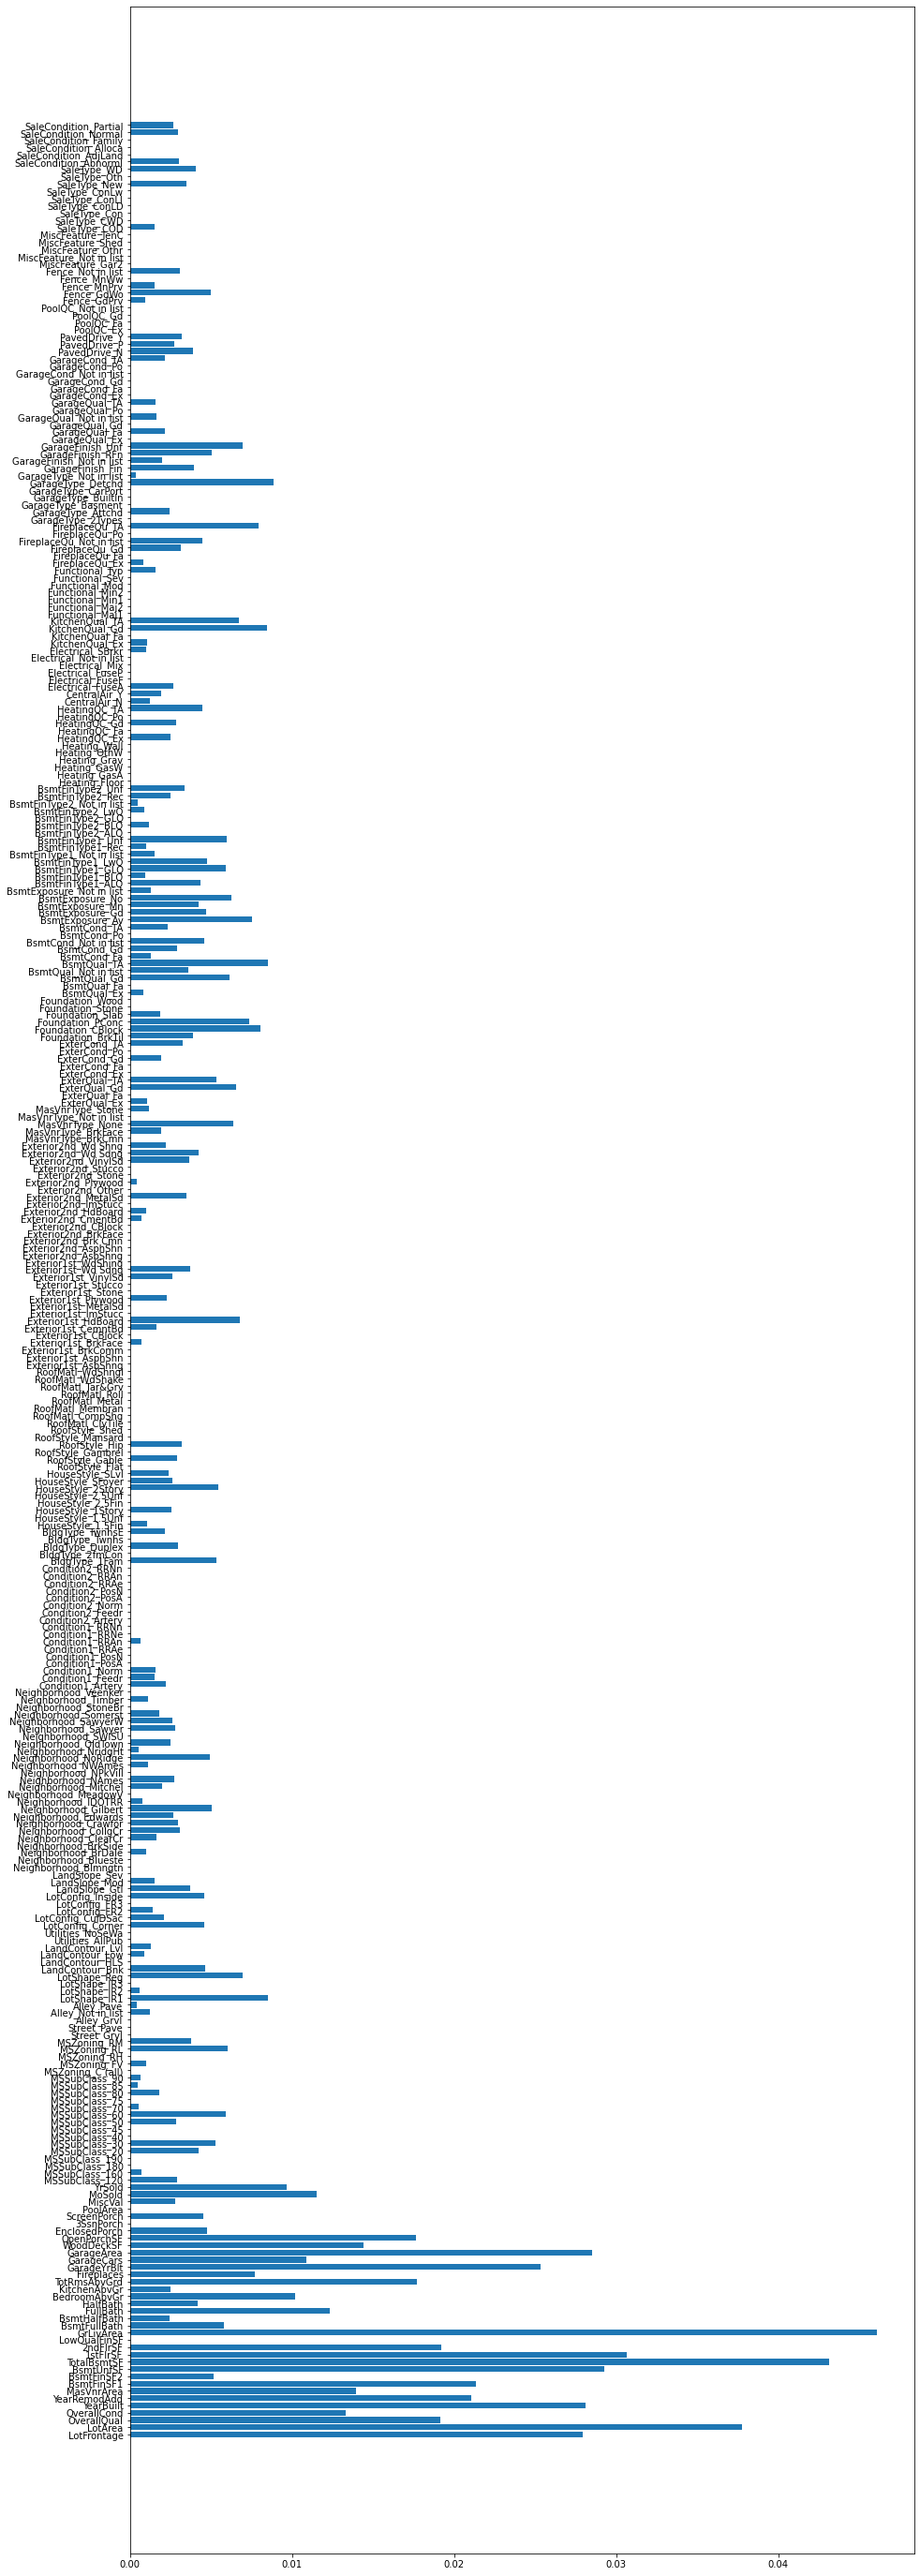

In [64]:
plt.figure(figsize=(15, 50))

features, columns = clf_rf.feature_importances_, X_train.columns

plt.barh(np.arange(len(features)), features)
_ = plt.yticks(np.arange(len(columns)), columns)

### Let's remove non-important features 

In [65]:
zipped = list(zip(clf_rf.feature_importances_, X_train.columns))
importants = [x for x in zipped if x[0] > 0.002]
unzipped = list(zip(*importants))
unzipped

[(0.027938811663247336,
  0.037745479318020934,
  0.019149932664363822,
  0.013309549976172374,
  0.028131696605258372,
  0.021062280294410634,
  0.013948513237386662,
  0.021336370772005408,
  0.005170173671240179,
  0.029243007382815236,
  0.04313696763353091,
  0.030641352879983045,
  0.01918837355146974,
  0.046062510058509316,
  0.005828635668895957,
  0.002447693521908874,
  0.012328749178020737,
  0.00419767786277995,
  0.010171506995364243,
  0.002498568628025687,
  0.017732021800395438,
  0.0077042973880599485,
  0.0253465456918331,
  0.010860586752721306,
  0.02849712852376853,
  0.014425551567543639,
  0.017666290567428976,
  0.004768034701353321,
  0.004546319256468258,
  0.0027984402743025582,
  0.011542745173650955,
  0.009689536301053684,
  0.0029321976849347193,
  0.004218884266073446,
  0.005301494510788673,
  0.002833843787027702,
  0.005940304904524666,
  0.00602083007416867,
  0.003765596529558639,
  0.00851336418419616,
  0.006984013375099401,
  0.00464209519882089

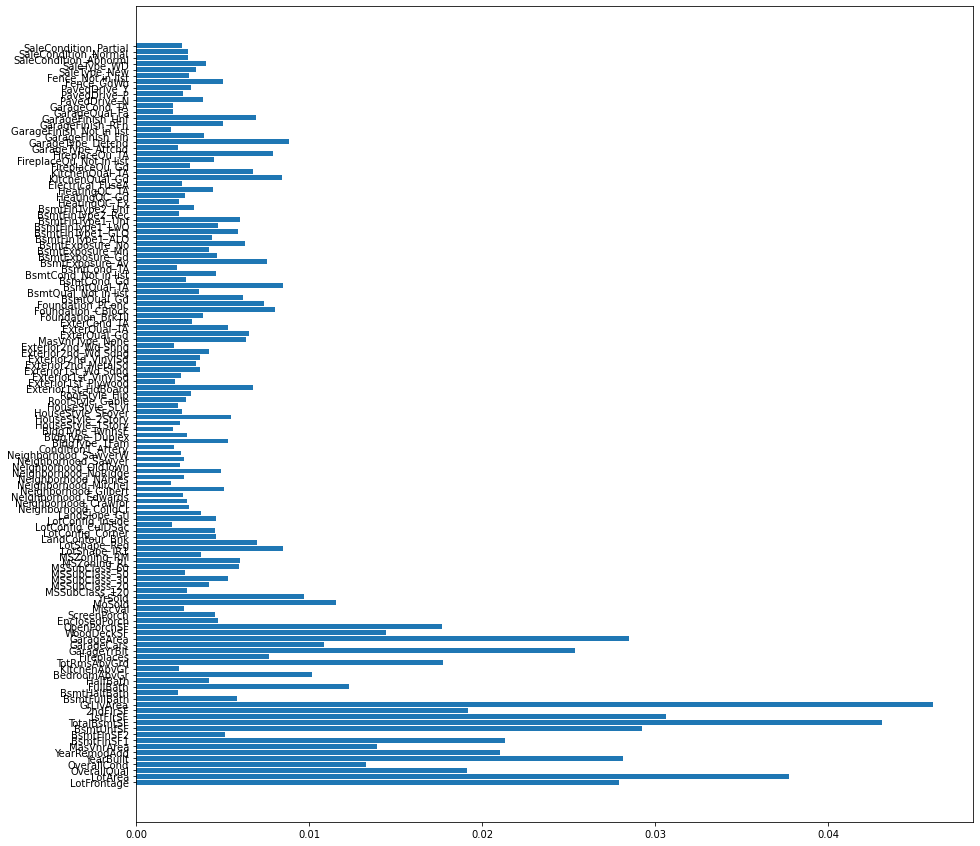

In [66]:
plt.figure(figsize=(15, 15))

important_features, important_columns = unzipped[0], unzipped[1]

plt.barh(np.arange(len(important_features)), important_features)
_ = plt.yticks(np.arange(len(important_columns)), important_columns)

In [67]:
len(important_columns)

124

### Let's try to use important features only

In [68]:
dropped_cols = [x for x in X_train if x not in important_columns]
dropped_cols

['LowQualFinSF',
 '3SsnPorch',
 'PoolArea',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_Not in list',
 'Alley_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NridgHt',
 'Neighborhood_SWISU',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA'

In [69]:
X_train_important = X_train.drop(columns=dropped_cols)
X_train_important.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_Not in list,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
691,104.0,21535,10,6,1994,1995,1170.0,1455,0,989,...,0,0,1,0,1,0,1,0,1,0
388,93.0,9382,7,5,1999,2000,125.0,0,0,1468,...,0,0,1,0,1,0,1,0,1,0
1362,0.0,12513,4,4,1920,2007,0.0,0,0,715,...,0,0,1,0,1,0,1,0,1,0
953,0.0,11075,5,4,1969,1969,232.0,562,193,29,...,0,0,1,0,0,0,1,0,1,0
914,30.0,3000,6,5,2009,2009,76.0,294,0,318,...,0,0,1,0,1,1,0,0,0,1


In [70]:
X_test_important = X_test.drop(columns=dropped_cols)
X_test_important.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_Not in list,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
1395,88.0,12665,8,5,2005,2006,245.0,0,0,1094,...,0,0,1,0,1,0,1,0,1,0
631,34.0,4590,8,5,2006,2006,108.0,24,0,1530,...,0,0,1,0,1,0,1,0,1,0
945,98.0,8820,5,6,1890,1996,0.0,1088,0,0,...,0,0,1,0,0,0,1,0,1,0
1312,0.0,9572,8,5,1990,1990,336.0,482,0,971,...,0,0,1,0,1,0,1,0,1,0
499,70.0,7535,5,7,1958,1985,0.0,111,279,522,...,0,0,1,0,0,0,1,0,1,0


In [71]:
clf_rf.fit(X_train_important, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=10, n_jobs=-1)

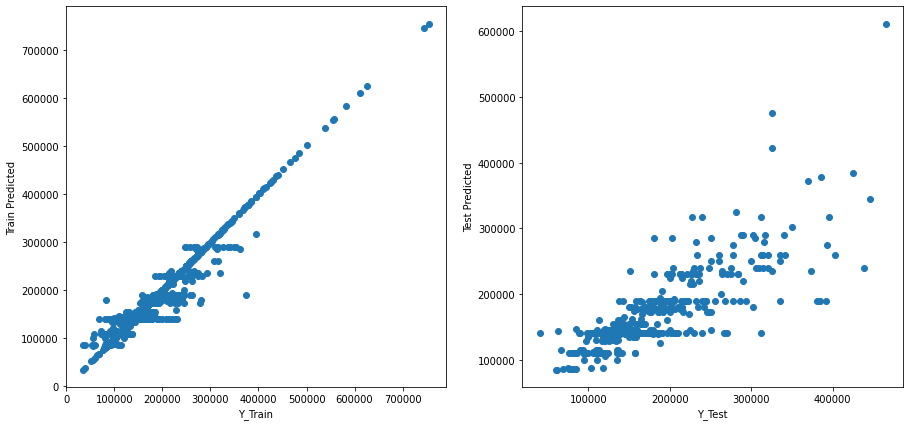

--- Train: Pred.val: 755000  Orig.val: 755000
--- Test: Pred.val: 325000  Orig.val: 281213
MSE Train: 19055.132971759303  MSE Test: 43838.627579351705 
Score Train: 0.6046966731898239  Score Test: 0.01598173515981735
Diff with etalon:
MSETrain: 5661.11014881037  MSETest: 3044.7742025321713 
Score_train: -0.5887149380300065 Score_test: 0.5955642530984997


In [72]:
_ = mse_score(clf_rf, etalon_score, X_train_important, X_test_important)

### Let's add ensemble

In [74]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Prepare data

In [75]:
from sklearn.preprocessing import StandardScaler

X_train_ensemble = X_train.copy(deep=True)
X_test_ensemble = X_test.copy(deep=True)

In [76]:
if 'SalePrice' in num_feat: num_feat.remove('SalePrice')

In [77]:
train_median = X_train_ensemble[num_feat].median()

scaler = StandardScaler()
scaler.fit(X_train_ensemble[num_feat])

X_train_ensemble[num_feat] = scaler.transform(X_train_ensemble[num_feat])
X_test_ensemble[num_feat] = scaler.transform(X_test_ensemble[num_feat])

In [78]:
X_train_ensemble

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
691,1.337461,1.132870,2.804076,0.413158,0.744149,0.487042,5.676229,2.132198,-0.290109,0.970782,...,0,0,0,1,0,0,0,0,1,0
388,1.019896,-0.103970,0.640690,-0.494902,0.910857,0.729566,0.103416,-0.955046,-0.290109,2.062697,...,0,0,0,1,0,0,0,0,1,0
1362,-1.664969,0.214679,-1.522697,-1.402962,-1.723124,1.069101,-0.563188,-0.955046,-0.290109,0.346178,...,0,0,0,1,0,0,0,0,1,0
953,-1.664969,0.068331,-0.801568,-1.402962,-0.089389,-0.774085,0.674030,0.237415,0.872060,-1.217609,...,0,0,0,1,0,0,0,0,1,0
914,-0.798884,-0.753482,-0.080439,-0.494902,1.244272,1.166110,-0.157893,-0.331232,-0.290109,-0.558812,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,-1.664969,0.637646,1.361818,0.413158,0.310709,-0.192026,2.919153,-0.955046,-0.290109,2.559644,...,0,0,0,1,0,0,0,0,1,0
939,-1.664969,1.392899,0.640690,1.321218,-1.056293,-1.695677,-0.563188,-0.955046,-0.290109,1.068803,...,0,0,0,0,0,0,0,0,1,0
962,-0.972101,-0.823908,-0.080439,0.413158,0.144001,-0.434551,-0.563188,0.224684,-0.290109,-0.718382,...,0,0,0,1,0,0,0,0,1,0
1078,-0.596797,-0.607438,-0.080439,-0.494902,1.077564,0.923586,0.338061,0.449597,-0.290109,-0.859716,...,0,0,0,1,0,0,0,0,1,0


In [79]:
X_train_ensemble.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,...,1022.000000,1022.00000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,-8.342968e-17,-4.953637e-17,-2.702774e-16,3.858622e-16,-3.163375e-15,4.060244e-15,2.520271e-17,-5.561978e-17,6.083414e-18,-5.301261e-17,...,0.002935,0.09002,0.002935,0.865949,0.070450,0.002935,0.006849,0.013699,0.814090,0.091977
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,0.054126,0.28635,0.054126,0.340874,0.256029,0.054126,0.082517,0.116294,0.389224,0.289134
min,-1.664969e+00,-9.264950e-01,-3.686083e+00,-3.219081e+00,-3.056785e+00,-1.695677e+00,-5.631881e-01,-9.550461e-01,-2.901092e-01,-1.283717e+00,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.524493e-01,-2.944882e-01,-8.015678e-01,-4.949016e-01,-5.895121e-01,-8.710944e-01,-5.631881e-01,-9.550461e-01,-2.901092e-01,-7.787911e-01,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.538107e-01,-1.060056e-01,-8.043902e-02,-4.949016e-01,4.397689e-02,4.385372e-01,-5.631881e-01,-1.498165e-01,-2.901092e-01,-1.974998e-01,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.157231e-01,1.231350e-01,6.406897e-01,4.131584e-01,9.775396e-01,9.235860e-01,3.113969e-01,5.673577e-01,-2.901092e-01,5.348131e-01,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,7.371192e+00,2.084721e+01,2.804076e+00,3.137338e+00,1.277613e+00,1.214615e+00,7.969348e+00,1.102049e+01,8.585732e+00,3.624205e+00,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [45]:
classifier = StackingClassifier(
    [
        ('RF', RandomForestClassifier()),
        ('LogR', LogisticRegression(max_iter=1e8)),
        ('DTC', DecisionTreeClassifier()),
        ('SVC', LinearSVC()),
    ],
LogisticRegression())

In [56]:
classifier.fit(X_train_ensemble, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:985: RuntimeWarning: Number of classes in training fold (463) does not match total number of classes (534). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn('Number of classes in training fold ({}) does '
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:985: RuntimeWarning: Number of classes in training fold (471) does not match total number of c

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:985: RuntimeWarning: Number of classes in training fold (466) does not match total number of classes (534). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn('Number of classes in training fold ({}) does '
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:985: RuntimeWarning: Number of classes in training fold (461) does not match total number of classes (534). Results may n

StackingClassifier(estimators=[('RF', RandomForestClassifier()),
                               ('LogR',
                                LogisticRegression(max_iter=100000000.0)),
                               ('DTC', DecisionTreeClassifier()),
                               ('SVC', LinearSVC())],
                   final_estimator=LogisticRegression())

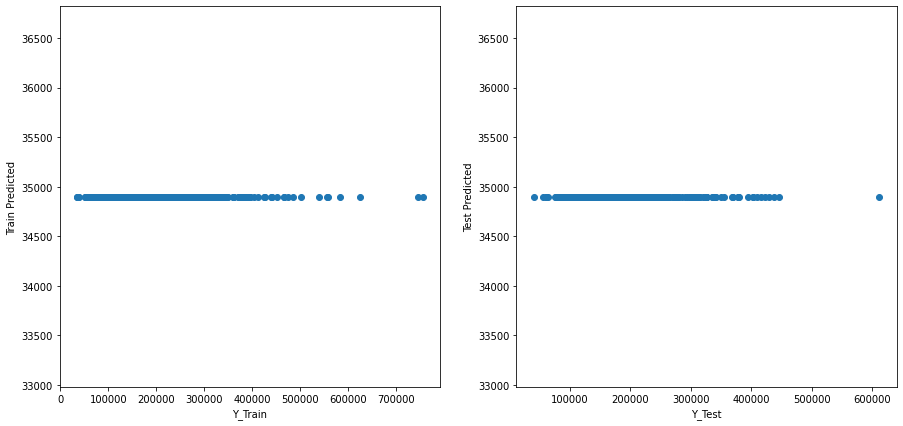

--- Train: Pred.val: 34900  Orig.val: 132500
--- Test: Pred.val: 34900  Orig.val: 177000
MSE Train: 166240.95565738494  MSE Test: 166169.98824595884 
Score Train: 0.0009784735812133072  Score Test: 0.0


(166240.95565738494, 166169.98824595884, 0.0, 0.0009784735812133072)

In [57]:
mse_score(classifier, None, X_train_ensemble, X_test_ensemble, no_limits=True)

In [58]:
classifier.predict(X_train_ensemble)


array([34900, 34900, 34900, ..., 34900, 34900, 34900])

### If stack has LinearClassifier, the result is a one value

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:985: RuntimeWarning: Number of classes in training fold (457) does not match total number of classes (528). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn('Number of classes in training fold ({}) does '
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:985: RuntimeWarning: Number of classes in training fold (462) does not match total number of classes (528). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn('Number of classes in training fold ({}) do

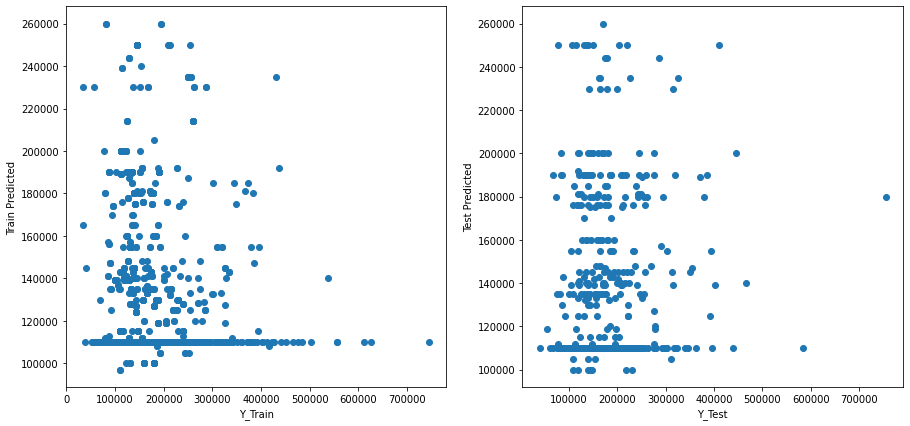

--- Train: Pred.val: 110000  Orig.val: 68400
--- Test: Pred.val: 115000  Orig.val: 194500
MSE Train: 103330.35399472484  MSE Test: 91395.19977573036 
Score Train: 0.00684931506849315  Score Test: 0.0045662100456621


(103330.35399472484,
 91395.19977573036,
 0.0045662100456621,
 0.00684931506849315)

In [145]:
classifier_no_linear = StackingClassifier(
    [
        ('RF', RandomForestClassifier()),
        ('LogR', LogisticRegression(max_iter=1e8)),
        ('DTC', DecisionTreeClassifier()),
    ],
LogisticRegression())
classifier_no_linear.fit(X_train_ensemble, y_train)
mse_score(classifier_no_linear, None, X_train_ensemble, X_test_ensemble)

### Let's make a compare train and test data with model's predictions

In [158]:
def make_table(X_data, y_data):
    rf_pred = best_rf.predict(X_data)
    ensemble_pred = classifier_no_linear.predict(X_data)
    
    compare = {"Actual": y_data, 'RF_Pred': rf_pred, 'Ens_Pred': ensemble_pred}
    
    tmp_table = pd.DataFrame(data=compare)
    tmp_table["RF_Error_Percent"]=(abs(tmp_table['RF_Pred'] - tmp_table['Actual']) / tmp_table['Actual'])
    tmp_table["RF_Error_Value"]=(abs(tmp_table['RF_Pred'] - tmp_table['Actual']))
    tmp_table["ENS_Error_Percent"]=(abs(tmp_table['Ens_Pred'] - tmp_table['Actual']) / tmp_table['Actual'])
    tmp_table["ENS_Error_Value"]=(abs(tmp_table['Ens_Pred'] - tmp_table['Actual']))

    max_err_rf = tmp_table['RF_Error_Percent'].max()
    max_err_ens = tmp_table['ENS_Error_Percent'].max()
    
    print(f'Max error RF: {max_err_rf} \nMax error Ensemble: {max_err_ens}')
    
    return tmp_table.sort_values("RF_Error_Percent", ascending=False).head(30)


In [159]:
make_table(X_train, y_train)

Max error RF: 2.151862464183381 
Max error Ensemble: 2.8681948424068766


,Actual,RF_Pred,Ens_Pred,RF_Error_Percent,RF_Error_Value,ENS_Error_Percent,ENS_Error_Value
495,34900,110000,135000,2.151862,75100,2.868195,100100
916,35311,110000,135000,2.115177,74689,2.823171,99689
30,40000,110000,135000,1.750000,70000,2.375000,95000
632,82500,180000,135000,1.181818,97500,0.636364,52500
1337,52500,110000,135000,1.095238,57500,1.571429,82500
462,62383,125000,155000,1.003751,62617,1.484651,92617
235,89500,155000,135000,0.731844,65500,0.508380,45500
1380,58500,100000,135000,0.709402,41500,1.307692,76500
232,94500,155000,135000,0.640212,60500,0.428571,40500
1279,68400,110000,135000,0.608187,41600,0.973684,66600


### Train data is good, now test data:

In [160]:
make_table(X_test, y_test)

Max error RF: 1.1501272264631044 
Max error Ensemble: 1.7989821882951653


,Actual,RF_Pred,Ens_Pred,RF_Error_Percent,RF_Error_Value,ENS_Error_Percent,ENS_Error_Value
533,39300,84500,110000,1.150127,45200,1.798982,70700
1325,55000,110000,135000,1.000000,55000,1.454545,80000
1378,83000,155000,135000,0.867470,72000,0.626506,52000
1100,60000,110000,155000,0.833333,50000,1.583333,95000
1143,80000,135000,135000,0.687500,55000,0.687500,55000
874,66500,110000,135000,0.654135,43500,1.030075,68500
620,67000,110000,135000,0.641791,43000,1.014925,68000
1324,147000,240000,155000,0.632653,93000,0.054422,8000
691,755000,290000,112000,0.615894,465000,0.851656,643000
837,100000,155000,135000,0.550000,55000,0.350000,35000


### RandomForest has better predictions for this dataset, may be Ebsemble with some other models will be better